In [ ]:
import tensorflow as tf
from tensorflow import keras
# print(tf.__version__)
# print(keras.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
uploaded=files.upload()
filename = list(uploaded.keys())[0]

Saving housing.csv to housing.csv


In [ ]:
#housing=pd.read_csv('F:\\housing.csv')  # The data set is read into housing variable as panda frame
housing=pd.read_csv(filename)  # The data set is read into housing variable as panda frame
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [ ]:
housing.pop('ocean_proximity')

housing1=housing
housing1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [ ]:

mx=housing1.max()
print(mx)
mn=housing1.min()
print('minimum values=\n',mn)

longitude               -114.3100
latitude                  41.9500
housing_median_age        52.0000
total_rooms            39320.0000
total_bedrooms          6445.0000
population             35682.0000
households              6082.0000
median_income             15.0001
median_house_value    500001.0000
dtype: float64
minimum values=
 longitude              -124.3500
latitude                 32.5400
housing_median_age        1.0000
total_rooms               2.0000
total_bedrooms            1.0000
population                3.0000
households                1.0000
median_income             0.4999
median_house_value    14999.0000
dtype: float64


In [ ]:
# Min-Max normalization
hnorm=(((housing1-housing1.min())/(housing1.max()-housing1.min()))) #min-max
print('hnorm=\n', hnorm)
print(hnorm.isna())
print(hnorm.isna().sum())
#hnorm.pop('total_bedrooms')
#print('hnorm=\n', hnorm')

hnorm=
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       0.211155  0.567481            0.784314     0.022331        0.019863   
1       0.212151  0.565356            0.392157     0.180503        0.171477   
2       0.210159  0.564293            1.000000     0.037260        0.029330   
3       0.209163  0.564293            1.000000     0.032352        0.036313   
4       0.209163  0.564293            1.000000     0.041330        0.043296   
...          ...       ...                 ...          ...             ...   
20635   0.324701  0.737513            0.470588     0.042296        0.057883   
20636   0.312749  0.738576            0.333333     0.017676        0.023122   
20637   0.311753  0.732200            0.313725     0.057277        0.075109   
20638   0.301793  0.732200            0.333333     0.047256        0.063315   
20639   0.309761  0.725824            0.294118     0.070782        0.095438   

       population  households  median_incom

In [ ]:
hnorm.pop('total_bedrooms')
hnorm

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.008941,0.020556,0.539668,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.067210,0.186976,0.538027,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.013818,0.028943,0.466028,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.015555,0.035849,0.354699,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.015752,0.042427,0.230776,0.674638
...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.023599,0.054103,0.073130,0.130105
20636,0.312749,0.738576,0.333333,0.017676,0.009894,0.018582,0.141853,0.128043
20637,0.311753,0.732200,0.313725,0.057277,0.028140,0.071041,0.082764,0.159383
20638,0.301793,0.732200,0.333333,0.047256,0.020684,0.057227,0.094295,0.143713


In [ ]:
target = hnorm.pop('median_house_value')
target


,median_house_value
0,0.902266
1,0.708247
2,0.695051
3,0.672783
4,0.674638
...,...
20635,0.130105
20636,0.128043
20637,0.159383
20638,0.143713


In [ ]:
hnorm

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income
0,0.211155,0.567481,0.784314,0.022331,0.008941,0.020556,0.539668
1,0.212151,0.565356,0.392157,0.180503,0.067210,0.186976,0.538027
2,0.210159,0.564293,1.000000,0.037260,0.013818,0.028943,0.466028
3,0.209163,0.564293,1.000000,0.032352,0.015555,0.035849,0.354699
4,0.209163,0.564293,1.000000,0.041330,0.015752,0.042427,0.230776
...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.023599,0.054103,0.073130
20636,0.312749,0.738576,0.333333,0.017676,0.009894,0.018582,0.141853
20637,0.311753,0.732200,0.313725,0.057277,0.028140,0.071041,0.082764
20638,0.301793,0.732200,0.333333,0.047256,0.020684,0.057227,0.094295


In [ ]:
y=target.values
x=hnorm.values
y
x

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.00894083, 0.02055583,
        0.53966842],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.0672104 , 0.18697583,
        0.53802706],
       [0.21015936, 0.5642933 , 1.        , ..., 0.01381765, 0.02894261,
        0.46602805],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.0281398 , 0.07104095,
        0.08276438],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.02068444, 0.05722743,
        0.09429525],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.03879032, 0.08699227,
        0.13025338]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.15,random_state=0) # seperating test and train samples with default split ratio
print('X_train', X_train)
print('X_test', X_test)
x_val=X_train[16000:]
y_val=y_train[16000:]
print('x_val=',x_val)

X_train [[0.25398406 0.58023379 0.64705882 ... 0.03680036 0.07531656 0.20943849]
 [0.72310757 0.0042508  0.21568627 ... 0.04994535 0.08945897 0.17430104]
 [0.22211155 0.54303932 0.49019608 ... 0.0023263  0.00394672 0.12931546]
 ...
 [0.2440239  0.4293305  0.58823529 ... 0.01964741 0.06446308 0.18605261]
 [0.63944223 0.11477152 0.64705882 ... 0.02940105 0.07679658 0.35389857]
 [0.87549801 0.02763018 0.2745098  ... 0.02861627 0.04884065 0.06126122]]
X_test [[0.72709163 0.0042508  0.41176471 ... 0.04338687 0.06084526 0.2518517 ]
 [0.63545817 0.1466525  0.60784314 ... 0.0362398  0.07038316 0.36411222]
 [0.25       0.64930925 0.54901961 ... 0.04347095 0.08765006 0.26543082]
 ...
 [0.57968127 0.20191286 0.35294118 ... 0.01813392 0.03157375 0.3820568 ]
 [0.60159363 0.1424017  0.39215686 ... 0.01914291 0.06561421 0.12974304]
 [0.60557769 0.15515409 0.88235294 ... 0.04775919 0.06709423 0.1136605 ]]
x_val= [[0.28984064 0.63336876 0.37254902 ... 0.03581939 0.08551225 0.06212328]
 [0.74003984 0.03

In [ ]:
model = keras.models.Sequential([
keras.layers.Dense(7, activation="relu",input_shape=(7,)),
keras.layers.Dense(32,activation="relu"),
keras.layers.Dense(32, activation="relu"),
keras.layers.Dense(32, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(1)
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │           3,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,125 (141.11 KB)

 Trainable params: 36,125 (141.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="mse", optimizer="Adam")


In [ ]:
history_object = model.fit(X_train, y_train, epochs=200,verbose=2,validation_data=(x_val, y_val))

Epoch 1/200
549/549 - 1s - 2ms/step - loss: 0.0118 - val_loss: 0.0103
Epoch 2/200
549/549 - 1s - 2ms/step - loss: 0.0118 - val_loss: 0.0101
Epoch 3/200
549/549 - 1s - 2ms/step - loss: 0.0116 - val_loss: 0.0107
Epoch 4/200
549/549 - 1s - 2ms/step - loss: 0.0118 - val_loss: 0.0107
Epoch 5/200
549/549 - 1s - 2ms/step - loss: 0.0117 - val_loss: 0.0101
Epoch 6/200
549/549 - 2s - 3ms/step - loss: 0.0118 - val_loss: 0.0106
Epoch 7/200
549/549 - 1s - 2ms/step - loss: 0.0117 - val_loss: 0.0100
Epoch 8/200
549/549 - 1s - 2ms/step - loss: 0.0116 - val_loss: 0.0100
Epoch 9/200
549/549 - 1s - 2ms/step - loss: 0.0116 - val_loss: 0.0123
Epoch 10/200
549/549 - 1s - 2ms/step - loss: 0.0116 - val_loss: 0.0101
Epoch 11/200
549/549 - 1s - 2ms/step - loss: 0.0115 - val_loss: 0.0098
Epoch 12/200
549/549 - 1s - 2ms/step - loss: 0.0116 - val_loss: 0.0105
Epoch 13/200
549/549 - 1s - 2ms/step - loss: 0.0115 - val_loss: 0.0097
Epoch 14/200
549/549 - 1s - 2ms/step - loss: 0.0114 - val_loss: 0.0100
Epoch 15/200
54

In [ ]:
htest = model.evaluate(X_test, y_test,verbose=2)

97/97 - 0s - 1ms/step - loss: 0.0121


In [ ]:
y_test


array([0.25134123, 0.46659808, 0.38288708, ..., 0.41814467, 0.45876306,
       0.18309409])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


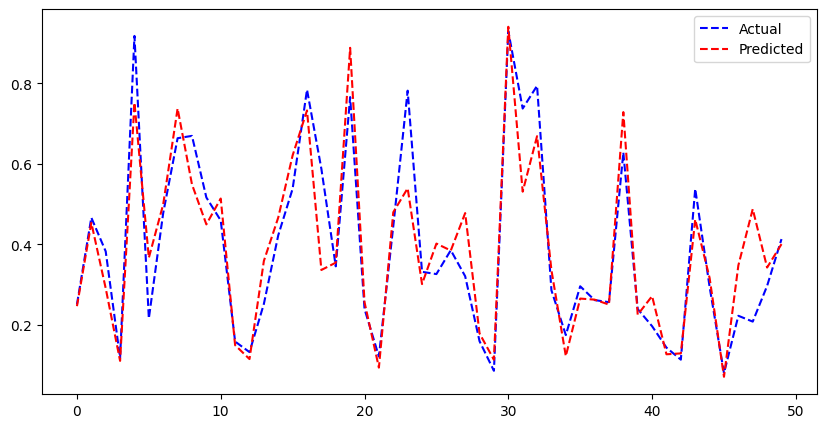

In [ ]:
X_new = X_test[:50] # pretend these are new instances
y_pred = model.predict(X_new)
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,len(X_new),1),y_test[:50],'b--',label='Actual')
plt.plot(np.arange(0,len(X_new),1),y_pred,'r--',label='Predicted')
plt.legend()
plt.show()
plt.show()
#plt.scatter(y_test[:20],y_pred)

[0.83094447]


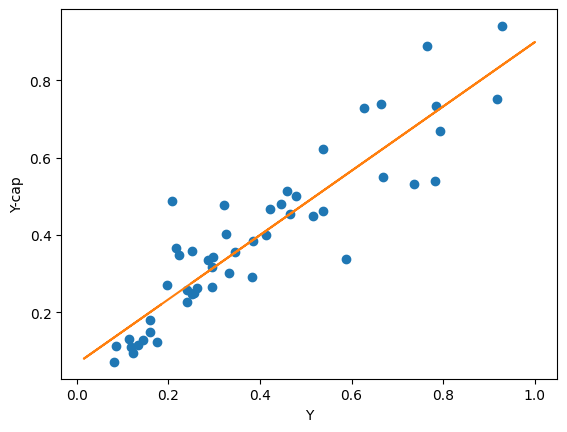

In [ ]:
X_new = X_test[:50]
plt. plot(y_test[:50],y_pred, 'o')
m, b = np. polyfit(y_test[:50],y_pred, 1)
plt. plot(y_test, m*y_test+ b)
plt.xlabel('Y')
plt.ylabel('Y-cap')
print(m)

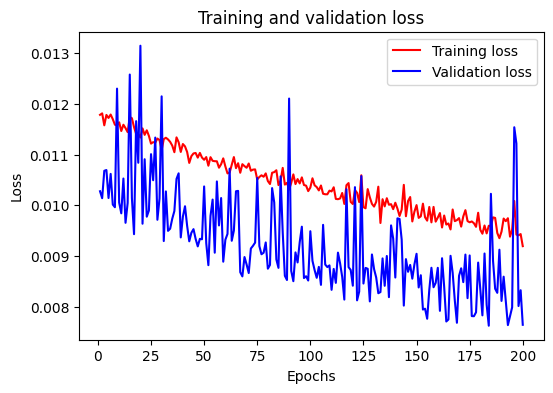

In [ ]:
history_dict = history_object.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
#acc = history_dict['accuracy']
epochs = range(1, len(loss_values)+1 )
plt.figure(figsize=(6, 4))
#plt.subplot(121)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()